This notebook will analyze the intensities and errors of CO 2-1 emission at the locations of all of the SNe in our sample across all of the resolutions in the survey.

We will use this to uncover what resolution will be best for this study.

This notebook produces figure 2 and the MGSD percentiles table.


In [1]:
import numpy as np
import astropy
import astropy.io.fits as pyfits
from astropy.table import Table, join
from astropy.io import ascii

import sys
sys.path.append('/home/mayker.1/Desktop/PythonFunctions')
#sys.path.append('/Users/nessmayker/Desktop/PythonFunctions')
from detectionFraction import detecFrac
from cumulativeDistFunc import makeCDF
from findPercentiles import findStats

In [2]:
#import SNe data 

SNe_Gal_File = '../Data/3.SNe+GalData.csv'
SNe_Gal_Data = Table.read(SNe_Gal_File, format='csv') 

intenFile = '../Data/3.IntenData.csv'
intenData = Table.read(intenFile, format='csv')

database  = join(SNe_Gal_Data, intenData, keys=('SN_name', 'galaxy'))


In [3]:

#This database is only holding the SNe that have 150pc maps and is missing 1988A, 1989M, 2018ivc, 2017gax

for i in range(len(database["SN_name"])):
    print(i, database["SN_name"][i], database["SN_type"][i])

0 ASASSN-14ha II
1 SN1901B I
2 SN1923A II
3 SN1926A II
4 SN1935C unclassified
5 SN1940E I
6 SN1950B unclassified
7 SN1957D unclassified
8 SN1959E I
9 SN1960F Ia
10 SN1961I II
11 SN1964F II
12 SN1967H II
13 SN1968L II
14 SN1972Q II
15 SN1973R II
16 SN1979C II
17 SN1981B Ia
18 SN1983N Ib
19 SN1983V Ic
20 SN1984J II
21 SN1985P II
22 SN1986G Ia
23 SN1986I II
24 SN1986L II
25 SN1988A II
26 SN1988M II
27 SN1989B Ia
28 SN1989M Ia
29 SN1992bd II
30 SN1993Z Ia
31 SN1995V II
32 SN1996cr II
33 SN1999em II
34 SN1999eu II
35 SN1999gn II
36 SN2001du II
37 SN2003jg Ic
38 SN2005at Ic
39 SN2005df Ia
40 SN2006X Ia
41 SN2006ov II
42 SN2007it II
43 SN2008bk II
44 SN2008eh unclassified
45 SN2009hd II
46 SN2009ib II
47 SN2010el Ia
48 SN2011ja II
49 SN2012A II
50 SN2012cg Ia
51 SN2012fr Ia
52 SN2013ej II
53 SN2014L Ic
54 SN2014dt Ia
55 SN2016adj IIb
56 SN2016cok II
57 SN2017gax Ib/c
58 SN2018ivc II
59 SN2019ehk Ib
60 SN2020jfo II
61 SN2020nvb Ia
62 SN2020oi Ic


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def setupBar(low, high, resArray, resStr):
    '''
    set up figure 2 barplot.
    
    '''
    lowStr = "No or Weak Detection (S/N < " + str(low) + ")"
    midStr = "Moderate Detection (" + str(low) + " $\leq$ S/N < " + str(high) + ")"
    upStr  = "Strong Detection (" + str(high) + " $\leq$ S/N)" 

    x = [lowStr, midStr, upStr]
    x_pos = [i for i, _ in enumerate(x)]

    lowCtr, midCtr, upCtr = 0,0,0

    for i in range(len(resArray)):
        if resArray[i] < low:
            lowCtr += 1
        elif resArray[i] > low and resArray[i] < high:
            midCtr += 1
        elif resArray[i] > high:
            upCtr += 1
    
    bars = [lowCtr, midCtr, upCtr]

    return(x, x_pos, bars)    


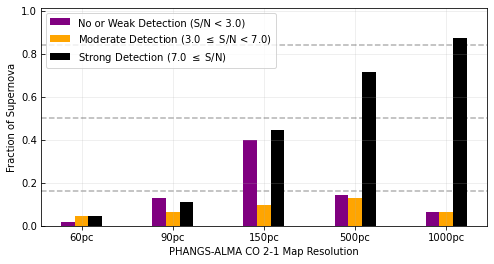

<Figure size 432x288 with 0 Axes>

[25, 6, 28]
63


In [13]:
low, high = 3.0, 7.0
x60, x_pos60, bar60     = setupBar(low, high, database['pc60SNR'], '60pc')
x90, x_pos90, bar90     = setupBar(low, high, database['pc90SNR'], '90pc')
x120, x_pos120, bar120   = setupBar(low, high, database['pc120SNR'], '120pc')
x150, x_pos150, bar150   = setupBar(low, high, database['pc150SNR'], '150pc')
x500, x_pos500, bar500   = setupBar(low, high, database['pc500SNR'], '500pc')
x750, x_pos750, bar750   = setupBar(low, high, database['pc750SNR'], '750pc')
x1000, x_pos1000, bar1000 = setupBar(low, high, database['pc1000SNR'], '1000pc')

sampleSize = len(database['SN_name'])
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.15  # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_figheight(4)
fig.set_figwidth(8)
ax.grid(True, alpha = 0.25)
ax.axhline(y=0.16, ls = '--', color = 'k', alpha = 0.3, zorder=0)
ax.axhline(y=0.50, ls = '--', color = 'k', alpha = 0.3)
ax.axhline(y=0.84, ls = '--', color = 'k', alpha = 0.3)
rects1 = ax.bar(ind[0], bar60[0]/sampleSize, width, color='purple')
rects2 = ax.bar(ind[1], bar90[0]/sampleSize, width, color='purple')
rects3 = ax.bar(ind[2], bar150[0]/sampleSize, width, color='purple')
rects4 = ax.bar(ind[3], bar500[0]/sampleSize, width, color='purple')
rects7 = ax.bar(ind[4], bar1000[0]/sampleSize, width, color='purple')
rects1 = ax.bar(ind[0]+width, bar60[1]/sampleSize, width, color='orange')
rects2 = ax.bar(ind[1]+width, bar90[1]/sampleSize, width, color='orange')
rects3 = ax.bar(ind[2]+width, bar150[1]/sampleSize, width, color='orange')
rects4 = ax.bar(ind[3]+width, bar500[1]/sampleSize, width, color='orange')
rects8 = ax.bar(ind[4]+width, bar1000[1]/sampleSize, width, color='orange')
rects1 = ax.bar(ind[0]+2*width, bar60[2]/sampleSize, width, color='black')
rects2 = ax.bar(ind[1]+2*width, bar90[2]/sampleSize, width, color='black')
rects3 = ax.bar(ind[2]+2*width, bar150[2]/sampleSize, width, color='black')
rects4 = ax.bar(ind[3]+2*width, bar500[2]/sampleSize, width, color='black')
rects9 = ax.bar(ind[4]+2*width, bar1000[2]/sampleSize, width, color='black')
ax.set_ylabel('Fraction of Supernova')
ax.set_ylim(0.0,1.01)
ax.set_xticks(ind + width)
ax.tick_params(axis='y', direction='in')
ax.set_xticklabels(['60pc', '90pc', '150pc', '500pc', '1000pc'])
ax.set_xlabel("PHANGS-ALMA CO 2-1 Map Resolution")
ax.legend((rects7[0], rects8[0],rects9[0]), (x60))
plt.show()
plt.tight_layout()
fig.savefig('../Figures/SNR_Dist_BySNR.png', dpi=300)
plt.show()
plt.close()

print(bar150)
print(sampleSize)

In [6]:
def printStats(bar, res):
    numSNe = np.sum(bar)
    nodet = bar[0]
    modet = bar[1]
    hidet = bar[2]
    noPer = round(nodet/numSNe*100, 2)
    moPer = round(modet/numSNe*100, 2)
    hiPer = round(hidet/numSNe*100, 2)
    print(res,": ",numSNe," SNe:",noPer," % non",moPer," % moderate",hiPer," % strong")
        


printStats(bar1000, "1000")
printStats(bar750, "750")
printStats(bar500, "500")
printStats(bar150, "150")
printStats(bar120, "120")
printStats(bar90, "90")
printStats(bar60, "60")

1000 :  63  SNe: 6.35  % non 6.35  % moderate 87.3  % strong
750 :  63  SNe: 7.94  % non 11.11  % moderate 80.95  % strong
500 :  62  SNe: 14.52  % non 12.9  % moderate 72.58  % strong
150 :  59  SNe: 42.37  % non 10.17  % moderate 47.46  % strong
120 :  47  SNe: 38.3  % non 17.02  % moderate 44.68  % strong
90 :  19  SNe: 42.11  % non 21.05  % moderate 36.84  % strong
60 :  7  SNe: 14.29  % non 42.86  % moderate 42.86  % strong


In [7]:
# for i in range(len(database)):
#     print(database['pc1000Int'][i],database['galaxy'][i])
    

In [8]:

def percentiles(array):

    vals = np.asarray(array)
    
    for i in range(len(vals)):
        if vals[i] < 0.0:
            vals[i] = 0.0
    
    vals = vals[np.isfinite(vals)]
    
    percentile = np.linspace(0,1,len(vals))
    stats = findStats(percentile, vals)

    return(stats, len(vals))

def mgsdPercentiles(res):

    msgdStr = "pc" + str(res) + "mgsd"
    errStr = "pc" + str(res) + "mgsdErr"

    mgsdgroup = database.group_by([msgdStr, errStr])

    mgsdSort, errSort = [],[]
    
    # remove nans and set negative values to zero
    for i in range(len(mgsdgroup)):
        if np.isfinite(mgsdgroup[msgdStr][i]):
            if mgsdgroup[msgdStr][i] < 0:
                mgsdgroup[msgdStr][i] = 0.0
            if mgsdgroup[errStr][i] < 0:
                mgsdgroup[errStr][i] = 0.0
            mgsdSort.append(mgsdgroup[msgdStr][i])
            errSort.append(mgsdgroup[errStr][i])
        else:
            pass

    # find normalized cumulative dictribution    
    mgsdSort = np.sort(mgsdSort)
    errSort = np.sort(errSort)
    mgsdCS = np.cumsum(mgsdSort)/np.sum(mgsdSort)
    errCS = np.cumsum(errSort)/np.sum(errSort)

    # find three sigmas
    percentiles = np.interp([0.16,0.5,0.84],mgsdCS,mgsdSort)
    for i in range(len(percentiles)):
        percentiles[i] = round(percentiles[i],2)
    print(res, len(mgsdSort), percentiles)


In [9]:
# Find entries for Latex Table : MGSD Percentiles at all resolutions at locations of SNe

pc60mgsdTiles = mgsdPercentiles(60)
pc90mgsdTiles = mgsdPercentiles(90)
pc120mgsdTiles = mgsdPercentiles(120)
pc150mgsdTiles = mgsdPercentiles(150)
pc500mgsdTiles = mgsdPercentiles(500)
pc750mgsdTiles = mgsdPercentiles(750)
pc1000mgsdTiles = mgsdPercentiles(1000)


60 7 [134.26 352.67 599.54]
90 19 [ 70.34 362.44 619.8 ]
120 47 [ 91.73 423.39 958.5 ]
150 59 [124.67 600.78 980.43]
500 62 [ 76.53 482.53 858.01]
750 63 [ 82.63 457.53 778.93]
1000 63 [ 75.64 381.39 690.91]


In [10]:
print(len(database))

63


In [11]:
# calculate the percentile of CO2-1 emission from the entire galaxy
for i in range(len(database["galaxy"])):
    
    # pull all intensity values for each galaxy
    galaxy = database["galaxy"][i]
